 # Data Transformation
 
For this notebook, I will be using the following libraries:

- pandas for data manipulation.
- numpy for mathematical operations.
- seaborn and matplotlib for data visualizing.
- sklearn for machine learning.
- scipy for statistical operations.

## 1- Import the required libraries

In [1]:
# Data manipulation and mathematical operations
import pandas as pd
import numpy as np 

# Statistical computations
from scipy.stats import norm
from scipy import stats

# imputation
from sklearn.impute import KNNImputer

# encoding 
import category_encoders as ce
# Label Encoding
from sklearn.preprocessing import LabelEncoder
#One hot encoding 
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Data visualization 
%matplotlib inline
import seaborn as sns 
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
import missingno as msno
%matplotlib inline

In [5]:
### Define some useful functions 
#The function is used to determine the type of the column:Categorical or Numerical  
def utils_recognize_type(dtf, col, max_cat):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [6]:
#####################################
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

This notebook includes some data transformation instructions that should be pursued by any data scientist before applying any machine learning algorithm and after performing all required data cleaning tasks. It illustrates all data transformation steps.

## 2- Data reading 

In [7]:
df=pd.read_csv('./data/weatherHistory.csv')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [8]:
# Giving look to the tail
df.tail(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [9]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
df.shape

(96453, 12)

In the next cell, I am selecting the most important features to work with discarding all irrelevant ones.

In [11]:
numerical_columns=['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_select=df[numerical_columns]
df_select.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63


## 4- Data transformation  : normalization, scaling, standardisation

### 4.1- Data Normalization 
- Data normalization consists of transforming features to be on a similar scale.
- This improves the performance and training stability of the model. 
- Actually, not all datasets requires normalization, it is only required when the features range difference is very high. for example feature1 varies from 0 to 20 while feature2 varies from 1000 to 5000.

There are four common normalization techniques may be useful : 
- Min-Max feature scaling. 
- Maximum absolute scaling
- Z-score or Standardization Scaling 
- Log scaling : transform data to log values to compress a wide range to a narrow range. For example [0-35000] tranformed to [0-9]


Here are other moethods for feature scaling : 


- Feature Clipping : used also to remove outliers. It consists on capping all feature values greater or less then a threshold (can be 99th-percentile) to a fixed value. For example, all battery values below 15 are clipped to be exactly 15.


Note : 
- Normalization could be also called scalling .
- The mean shows us the central tendency of the distribution.
- The standard deviation quantifies its amount of variation. 
- For example, a low standard deviation suggests that data points tend to be close to the mean. 

#### a. Min-Max feature scaling (Normalization)
- Called also The min-max feature scaling|Scaling to a range.
- This can give us an idea about the range of values and is helpful to detect outliers.
- It subtracts the minimum value from each column’s highest value and divide by the range.
- Each new column has a minimum value of 0 (or -1) and a maximum value of 1. 
- range for min-max is [new min, new max] or commonly [0.0, 1.0] or [ -1.0, 1.0 ]

In [13]:
# scale only one column using scikit-learn 'Wind Bearing (degrees)' (o,1)
# copy the data 
df_sklearn = df_select.copy() 
column = 'Wind Bearing (degrees)'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
df_sklearn.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,0.699164,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,0.721448,15.8263,1015.63


In [14]:
# apply normalization techniques by Pressure (millibars) 
column = 'Pressure (millibars)'
df_min_max_scaled = df_select.copy() 
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
df_min_max_scaled.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.970135
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.970613


#### b. Maximum absolute scaling (Normalization)


In [15]:
# copy the data 
df_max_scaled = df_select.copy() 

# apply normalization techniques on Wind Speed (km/h) 
column = 'Wind Speed (km/h)'
df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max() 

# view normalized data 
display(df_max_scaled) 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,0.221130,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,0.223399,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,0.061523,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,0.220877,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,0.172970,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,0.172214,31.0,16.1000,1014.36
96449,24.583333,24.583333,0.48,0.158094,20.0,15.5526,1015.16
96450,22.038889,22.038889,0.56,0.140696,30.0,16.1000,1015.66
96451,21.522222,21.522222,0.60,0.164902,20.0,16.1000,1015.95


#### c. Z-score method (Standardization Scaling):
- It is also identified as Standardisation technique.
- Normalization and standardization are not the same things. 
- Standardization, interestingly, refers to normalization plus setting the mean to 0 and the standard deviation to 1.
- Normalization in machine learning is the process of translating data into the range [0, 1] or simply transforming data onto the unit sphere.
- Standardization Scaling transforms your feature distributions to have 0 as mean and 1 as std (so, to have normal distribution).
- It’s useful when there are a few outliers, but not so extreme that you need clipping.
- It is a variation of scaling that represents the number of standard deviations away from the mean.
- Range for z-score using std dev is [ - infinity, infinity ] although it is very unlikely to get extreme values


In [16]:
# copy the data 
df_z_scaled = df_select.copy() 

# apply normalization technique to Visibility (km)
column = 'Visibility (km)'
df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()

# view normalized data 
display(df_z_scaled) 


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,1.306969,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,1.306969,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,1.099580,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,1.306969,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,1.306969,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,1.372258,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,1.241680,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,1.372258,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,1.372258,1015.95


#### d. Data Standardisation using `StandardScaler`

As mentioned before, Standardization is different than Normalization as it first subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

In [20]:
# scale only one column using scikit-learn 'Wind Bearing (degrees)' (o,1)
# copy the data 
df_sklearn = df_select.copy() 
column = 'Humidity'
df_sklearn[column] = StandardScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
df_sklearn.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.793470,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.639996,14.2646,259.0,15.8263,1015.63


#### e. log scaling or Log transformation 
- The log transformation is the most popular among the different types of transformations used in machine learning.
- It aims to make highly skewed distributions (features with high variance) less skewed.
- If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.
- Generally, we use the natural logarithm function in Log transformation.
- Captures relative changes, the magnitude of change and keeps everything positive.


However, our real raw data do not always follow a normal distribution. They are often so skewed making the results of our statistical analyses invalid. That’s where Log Transformation comes in.


The normal distribution is very useful in machine learning becasue it has deterministic statistical characteristics  and it helps detect linear relationship between variables. It consists that mode=mean=median: 

- Mean: called also average of a data set and it is found by summing all numbers in the data set and then dividing by the number of values in the set.
- Mode : it is the value that appears most often in a set of data values.
- Median : the middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).

#### Example 1: 

In [21]:
# print variance of column
df_select.var()

Temperature (C)                91.232037
Apparent Temperature (C)      114.422544
Humidity                        0.038210
Wind Speed (km/h)              47.797464
Wind Bearing (degrees)      11531.200691
Visibility (km)                17.573897
Pressure (millibars)        13681.958835
dtype: float64

From the cell, above it is clear that `Apparent Temperature (C)`, `Temperature (C)`, `Pressure (millibars)` and `Visibility (km)` have significant variance, respectively.

In [22]:
# Calculate natural logarithm on
# 'Temperature (C)' column
df_select['Log Pressure (millibars)'] = np.log(df_select['Pressure (millibars)'])
 
# Show the dataframe
df_select.head(3)    

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/x_/_mmvg5sn65b5cx8542pkt62w0000gp/T/ipykernel_21789/1175346316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Log Pressure (millibars)'] = np.log(df_select['Pressure (millibars)'])


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Log Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,6.922772
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,6.923264
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,6.923570


In [23]:
print(df_select[['Pressure (millibars)', 'Log Pressure (millibars)']].var())

Pressure (millibars)        13681.958835
Log Pressure (millibars)             NaN
dtype: float64


#### Example 2 : 
Here, we can simply use the `skew()` function to calculate our skewness level of the `Wind Speed (km/h)`

In [53]:
print("Skewness: %f" % df['Wind Speed (km/h)'].skew())

Skewness: 1.113493


If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In our case, we have ~1.12, so it is considered highly skewed data.

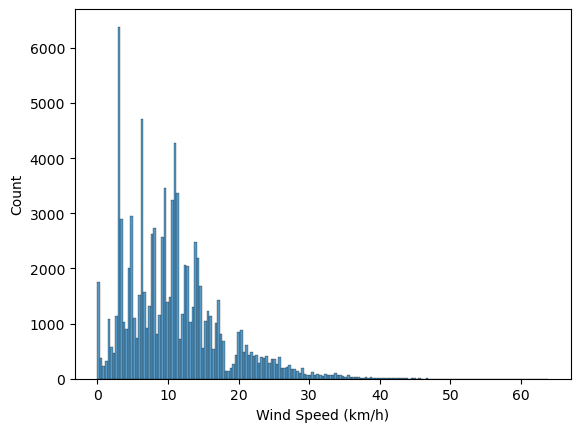

In [43]:
sp_untransformed = sns.histplot(df['Wind Speed (km/h)'])

In [55]:
log_transformed = np.log(df['Wind Speed (km/h)'])

In [46]:
#sp_transformed = sns.distplot(log_transformed)

In [56]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: nan


So the question here why do we get `nan` as Skewed data ????

There is other methods to correct data skewness. For example, Square Root Transform (np.sqrt) and the Box-Cox Transform (stats.boxcox from the scipy stats library)

###  4.2- Transforming categorical values to numeric variables

First of all, categorical variables can be divided into two categories:

* Nominal: no particular order
* Ordinal: there is some order between values

##### Why do we need to transform Categorical data to numerical ones ?

- Transforming categorical data to numerical data is an important step in many data analysis tasks.
- Categorical features Corresponds to string data types that is easily understood by human beings and hard to understand by machines.
- Categorical data must be converted into numerical data for further processing.
- Some machine learning algorithms do not accept categorical variables

In fact, there is three method to deal with categorical data: 

* Drop categorical variables : we could lose a lot of important information. It is not very recommended
* Ordinal encoding : it is not very recommended because it assumes certain order /ranking in the column values
* One-hot encoding : the best choice (most common and correct way). It consists on adding one column for each possible value. However, be careful if our dataset is very large so this method can greatly expand the size of the dataset (may keep only low cardinality columns and delete the ones with high cardinality)

### a. Solution 1: Using Python’s Category Encoder Library
category_encoders is an amazing Python library that provides 15 different encoding schemes.
- One-hot Encoding
- Label Encoding
- Ordinal Encoding
- Helmert Encoding
- Binary Encoding
- Frequency Encoding
- Mean Encoding
- Weight of Evidence Encoding
- Probability Ratio Encoding
- Hashing Encoding
- Backward Difference Encoding
- Leave One Out Encoding
- James-Stein Encoding
- M-estimator Encoding
- Thermometer Encoder

In [24]:
# One hot encoding 
ce_OHE = ce.OneHotEncoder(cols=['Summary','Precip Type'])

data1 = ce_OHE.fit_transform(df)
data1.head()

,Formatted Date,Summary_1,Summary_2,Summary_3,Summary_4,Summary_5,Summary_6,Summary_7,Summary_8,Summary_9,...,Precip Type_3,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,0,1,0,0,0,0,0,0,0,...,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,1,0,0,0,0,0,0,0,0,...,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,0,1,0,0,0,0,0,0,0,...,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [25]:
# Binary Encoding
binary_enc = ce.BinaryEncoder(cols=['Summary']);

# transform the data
data_binary = binary_enc.fit_transform(df['Summary']);
data_binary

,Summary_0,Summary_1,Summary_2,Summary_3,Summary_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
96448,0,0,0,0,1
96449,0,0,0,0,1
96450,0,0,0,0,1
96451,0,0,0,0,1


### b. Solution 2: Dummy Variable Encoding 
###### Using Pandas' Get Dummies


In [26]:
df_dummy=pd.get_dummies(df,columns=['Summary','Precip Type'])
df_dummy.head(4)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,...,0,0,0,0,0,0,0,0,1,0
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,...,1,0,0,0,0,0,0,0,1,0


### c. Solution 3: Using Scikit-learn
Scikit-learn also has 15 different types of built-in encoders, which can be accessed from sklearn.preprocessing.

In [27]:
# Scikit-learn One-hot Encoding
one_he = OneHotEncoder(handle_unknown='ignore',sparse=False)
data_summary = pd.DataFrame(one_he.fit_transform(df[["Summary"]]))

data_summary

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Scikit-learn Label Encoding
label_enc = LabelEncoder()
# Label encoder takes no arguments
label_enc_summary = label_enc.fit_transform(df[['Summary']])

/Users/badiaamakhlouf/opt/anaconda3/envs/data_test/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In label encoding, each category is assigned a value from 1 through N where N is the number of categories for the feature. There is no relation or order between these assignments.

In [29]:
label_enc_summary

array([19, 19, 17, ..., 19, 19, 19])

#### Note!!  Pandas Label Encoding
It is also possible to use  `cat.codes` method of pandas for label encoding

### d. Solution 4 : Ordinal Encoding
Ordinal encoding is used to retain the ordinal (ordered) nature of the variable while encoding it. It is very similar to label encoding, the only difference is that Label encoding discard variables order. 
So, Ordinal Encoding assigns a sequence of integers.

In [30]:
# here is an external example as in our dataset we do not have a good example for Ordinal encoding
weather = {'Weather' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
df_aus=pd.DataFrame(weather,columns=["Weather"])
weather_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
df_aus

,Weather
0,very cold
1,cold
2,warm
3,hot
4,very hot


### How to choose the best Encoding Method 
Actually, it is not possible to say that there is one encoding technique that best fits almost all the problems. Choosing the Encoding Method depends on a lot of factors such as if we need to keep order or not?, the size of our dataset, etc. 
Generally, get_dummies method has an advantage as it could be easily implmented.